# Using `atl03x` to get ICESat-2 data over the Boulder Watershed

Process ATL03 data from the Boulder Watershed region and produce a customized ATL06 elevation dataset.

### What is demonstrated

* The `atl03x` API is used to process the Boulder Watershed region
* The `matplotlib` and `geopandas` packages are used to plot the data returned by SlideRule

### Points of interest

This is a simple notebook showing how a region of interest can be processed by SlideRule and the results analyzed using geopandas GeoDataFrames and Matplotlib.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import sliderule, icesat2

## SlideRule Configuration

In [2]:
# Configure Region of Interest
region = [ {"lon":-105.82971551223244, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 39.81983728534918} ]

## Execute ATL06 Algorithm using SlideRule

In [3]:
%%time

# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "fit": {}
}

# Request ATL06 Data
gdf = sliderule.run("atl03x", parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Exception <-1>: Failure on resource ATL03_20240321233614_00512302_006_01.h5 beam gt3r: H5Coro::Future read failure on gt3r/heights/dist_ph_along


Reference Ground Tracks: [531  28 554  51 996 973]
Cycles: [24 18 10 25 21  9 12 19  4 20 22 16 15  6  5  8 13 23  1  2 17  7 14 11
 26  3]
Received 398866 elevations
CPU times: user 923 ms, sys: 303 ms, total: 1.23 s
Wall time: 50.7 s


## Plot Region

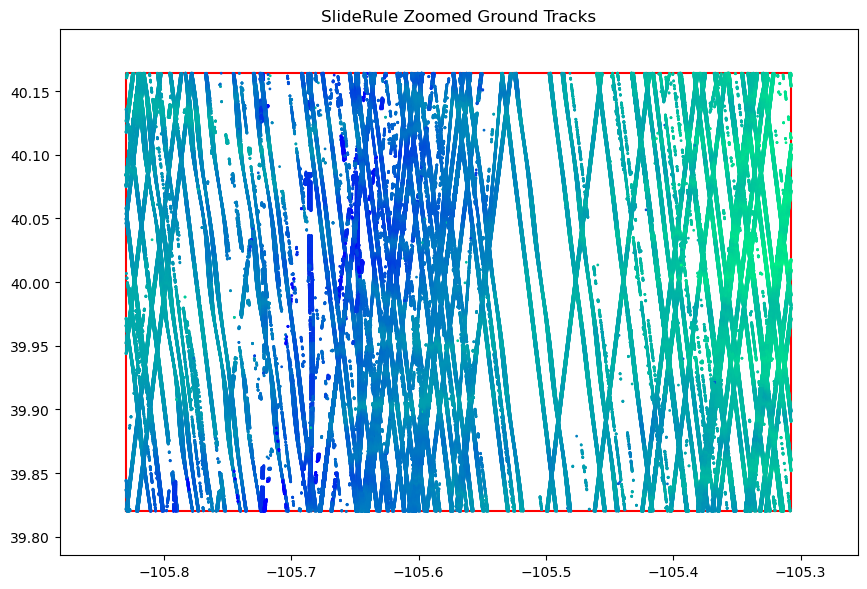

In [4]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,ax = plt.subplots(num=None, ncols=1, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax.set_title("SlideRule Zoomed Ground Tracks")
gdf.plot(ax=ax, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3)
ax.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout()